# Compute percentiles on the trends for both regional and spatial processed data

### Imports

In [1]:
import glob
import os
import numpy as np
import xarray as xr

### Load and process regional trend data

#### Models

In [2]:
# I need to go from the CAM output variables to the CMOR/CMIP standard names.
pic_tseries_dir = '/glade/u/home/jonahshaw/w/trend_uncertainty/nathan/CMIP6_PIC/'
cesm1_dir       = 'CESM1/xagg/'
mpi_dir         = 'MPI-GE/xagg/'
canesm2_dir     = 'CanESM2/xagg/'
esm2m_dir       = 'ESM2M/xagg/'

cesm1_cmor_var_dict = {'ts':'TS','tas':'TREFHT','psl':'PSL'}

In [3]:
cesm1_trends_filepath   = glob.glob('%s/%s/*.1900trends.040001-220012.nc' % (pic_tseries_dir,cesm1_dir))
mpi_trends_filepath     = glob.glob('%s/%s/*.1900trends.185001-385012.nc' % (pic_tseries_dir,mpi_dir))
canesm2_trends_filepath = glob.glob('%s/%s/*.1900trends.201501-301012.nc' % (pic_tseries_dir,canesm2_dir))
esm2m_trends_filepath   = glob.glob('%s/%s/*.1900trends.000101-050012.nc' % (pic_tseries_dir,esm2m_dir))

Load the trend data.

In [4]:
cesm1_pic_trends_all   = xr.open_dataarray(*cesm1_trends_filepath)

mpi_pic_trends_all     = xr.open_dataarray(*mpi_trends_filepath)

canesm2_pic_trends_all = xr.open_dataarray(*canesm2_trends_filepath)

esm2m_pic_trends_all   = xr.open_dataarray(*esm2m_trends_filepath)

### Compute trend percentiles (regional)

Calculate a 95% confidence interval on the PI-Control trends.

In [11]:
qlist = [0.025, 0.975]
cesm1_ipccregion_trends_percentiles = cesm1_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

filename = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.040001-220012.1900trends.Percentiles.nc'

cesm1_ipccregion_trends_percentiles.to_netcdf('%s/%s/%s' % (pic_tseries_dir,cesm1_dir,filename))

In [12]:
qlist = [0.025, 0.975]
mpi_ipccregion_trends_percentiles = mpi_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

filename = 'tas_Amon_MPI-ESM_piControl_r001i1850p3.185001-385012.1900trends.Percentiles.nc'

mpi_ipccregion_trends_percentiles.to_netcdf('%s/%s/%s' % (pic_tseries_dir,mpi_dir,filename))

In [13]:
qlist = [0.025, 0.975]
canesm2_ipccregion_trends_percentiles = canesm2_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

filename = 'tas_Amon_CanESM2_piControl_r1i1p1.201501-301012.1900trends.Percentiles.nc'

canesm2_ipccregion_trends_percentiles.to_netcdf('%s/%s/%s' % (pic_tseries_dir,canesm2_dir,filename))

In [14]:
qlist = [0.025, 0.975]
esm2m_ipccregion_trends_percentiles = esm2m_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

filename = 'tas_Amon_GFDL-ESM2M_piControl_r1i1p1.000101-050012.1900trends.Percentiles.nc'

esm2m_ipccregion_trends_percentiles.to_netcdf('%s/%s/%s' % (pic_tseries_dir,esm2m_dir,filename))

#### Clean up regional data from models

In [15]:
del (cesm1_pic_trends_all,
    mpi_pic_trends_all,
    canesm2_pic_trends_all,
    esm2m_pic_trends_all)

In [16]:
del (cesm1_ipccregion_trends_percentiles,
    mpi_ipccregion_trends_percentiles,
    canesm2_ipccregion_trends_percentiles,
    esm2m_ipccregion_trends_percentiles)

#### Observations

In [20]:
obs_tseries_dir = '/glade/u/home/jonahshaw/w/trend_uncertainty/nathan/OBS_LENS/'
gistemp_5x5_dir = 'GISTEMP_5x5/20240820/xagg/'
hadcrut5_dir    = 'HadCRUT5/20240820/xagg/'
dcent_unfilled_dir = "DCENT/20240901/xagg/"

In [21]:
gistemp_tas_var = 'tas'
hadcrut5_tas_var = 'tas'
dcent_unfilled_tas_var = "temperature"

In [22]:
gistemp_5x5_trends_filepath = glob.glob('%s/%s/*.trends.movingstartdate.IPCCRegions.190001-202012*.nc' % (obs_tseries_dir, gistemp_5x5_dir))
hadcrut5_trends_filepath = glob.glob('%s/%s/*.trends.movingstartdate.IPCCRegions.1900*.nc' % (obs_tseries_dir, hadcrut5_dir))
dcent_unfilled_trends_filepath = glob.glob('%s/%s/*.trends.movingstartdate.IPCCRegions.1900*.nc' % (obs_tseries_dir, dcent_unfilled_dir))

Load the trend data

In [23]:
gistemp_5x5_trends_all  = xr.open_dataarray(*gistemp_5x5_trends_filepath)
hadcrut5_trends_all     = xr.open_dataarray(*hadcrut5_trends_filepath)
dcent_unfilled_trends_all = xr.open_dataarray(*dcent_unfilled_trends_filepath)

In [24]:
gistemp_5x5_trends_1900 = gistemp_5x5_trends_all.sel(startyear=1)
hadcrut5_trends_1900    = hadcrut5_trends_all.sel(startyear=1)
dcent_unfilled_trends_1900 = dcent_unfilled_trends_all.sel(startyear=1)

In [25]:
qlist = [0.025, 0.5, 0.975]
gistemp_5x5_trends_percentiles  = gistemp_5x5_trends_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'ensembleChunks_0001_0200.trends.movingstartdate.Percentiles.IPCCRegions.190001-202012.nc'

gistemp_5x5_trends_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, gistemp_5x5_dir, filename))

/glade/work/jonahshaw/conda-envs/py_xagg/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


In [32]:
hadcrut5_5x5_trends_percentiles = hadcrut5_trends_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'HadCRUT.5.0.2.0.001_200.trends.movingstartdate.Percentiles.IPCCRegions.190001-202012.nc'

hadcrut5_5x5_trends_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, hadcrut5_dir, filename))

In [40]:
dcent_unfilled_5x5_trends_percentiles = dcent_unfilled_trends_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'DCENT_ensemble_1850_2023.001_200.trends.movingstartdate.Percentiles.IPCCRegions.190001-202312.nc'

dcent_unfilled_5x5_trends_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, dcent_unfilled_dir, filename))

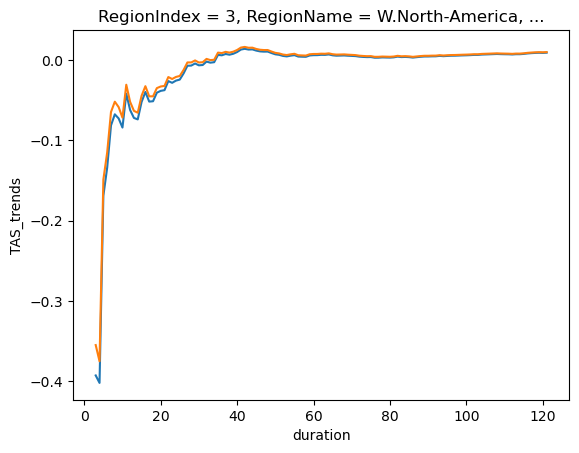

In [37]:
dcent_unfilled_5x5_trends_percentiles.sel(RegionIndex=3, percentile=0.025).plot()
dcent_unfilled_5x5_trends_percentiles.sel(RegionIndex=3, percentile=0.975).plot()

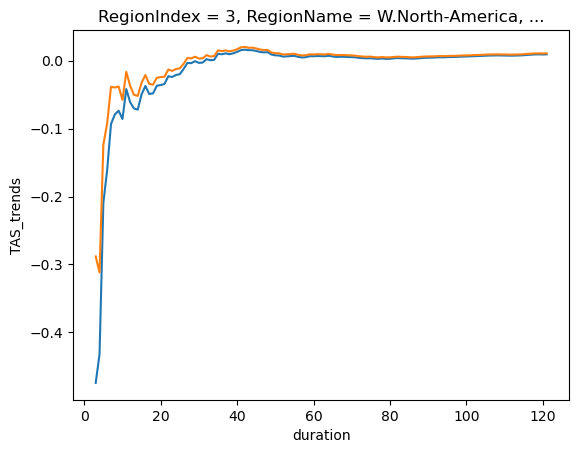

In [38]:
gistemp_5x5_trends_percentiles.sel(RegionIndex=3, percentile=0.025).plot()
gistemp_5x5_trends_percentiles.sel(RegionIndex=3, percentile=0.975).plot()

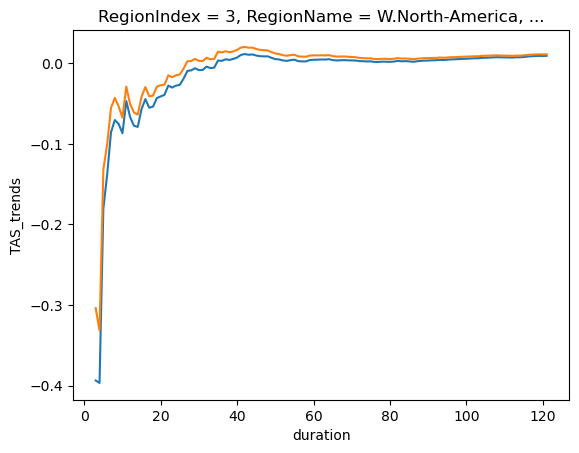

In [39]:
hadcrut5_5x5_trends_percentiles.sel(RegionIndex=3, percentile=0.025).plot()
hadcrut5_5x5_trends_percentiles.sel(RegionIndex=3, percentile=0.975).plot()

#### Clean up regional data from observations

In [41]:
del gistemp_5x5_trends_all, hadcrut5_trends_all, dcent_unfilled_trends_all
del gistemp_5x5_trends_1900, hadcrut5_trends_1900, dcent_unfilled_trends_1900

In [42]:
del gistemp_5x5_trends_percentiles, hadcrut5_5x5_trends_percentiles, dcent_unfilled_5x5_trends_percentiles

## Compute trend percentiles (spatial 5x5 deg.)

Don't need to do this for the obs. unless for visualization, not used in ToE.

### Load processed trend data

#### Models

In [ ]:
# I need to go from the CAM output variables to the CMOR/CMIP standard names.
pic_tseries_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/CMIP6_PIC/'
cesm1_dir       = 'CESM1/'
mpi_dir         = 'MPI-GE/'
canesm2_dir     = 'CanESM2/'
esm2m_dir       = 'ESM2M/'

cesm1_cmor_var_dict = {'ts':'TS','tas':'TREFHT','psl':'PSL'}

In [ ]:
cesm1_trends_filepath   = glob.glob('%s/%s/*5x5degSpatialTrends.3_120_years.nc' % (pic_tseries_dir,cesm1_dir))
mpi_trends_filepath     = glob.glob('%s/%s/*5x5degSpatialTrends.3_120_years.nc' % (pic_tseries_dir,mpi_dir))
canesm2_trends_filepath = glob.glob('%s/%s/*5x5degSpatialTrends.3_120_years.nc' % (pic_tseries_dir,canesm2_dir))
esm2m_trends_filepath   = glob.glob('%s/%s/*5x5degSpatialTrends.3_120_years.nc' % (pic_tseries_dir,esm2m_dir))

Load the trend data.

In [ ]:
cesm1_pic_trends_all   = xr.open_dataarray(*cesm1_trends_filepath)

mpi_pic_trends_all     = xr.open_dataarray(*mpi_trends_filepath)

canesm2_pic_trends_all = xr.open_dataarray(*canesm2_trends_filepath)

esm2m_pic_trends_all   = xr.open_dataarray(*esm2m_trends_filepath)

Calculate a 95% confidence interval on the PI-Control trends.

In [ ]:
save_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/CMIP6_PIC/'

CESM1

In [ ]:
qlist = [0.025, 0.975]
cesm1_pic_trends_percentiles = cesm1_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

In [ ]:
filename = 'b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.040001-179912.5x5degSpatialTrends.3_120_years.Percentiles.nc'

# Don't delete
cesm1_pic_trends_percentiles.to_netcdf('%s/CESM1/%s' % (save_dir,filename))

MPI-GE

In [ ]:
mpi_pic_trends_percentiles = mpi_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

In [ ]:
filename = 'tas_Amon_MPI-ESM_piControl_r001i1850p3_185001-359912.5x5degSpatialTrends.3_120_years.Percentiles.nc'

# Don't delete
mpi_pic_trends_percentiles.to_netcdf('%s/MPI-GE/%s' % (save_dir,filename))

CanESM2

In [ ]:
canesm2_pic_trends_percentiles = canesm2_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

In [ ]:
filename = 'tas_Amon_CanESM2_piControl_r1i1p1_201501-301012.5x5degSpatialTrends.3_120_years.Percentiles.nc'

# Don't delete
canesm2_pic_trends_percentiles.to_netcdf('%s/CanESM2/%s' % (save_dir,filename))

ESM2M

In [ ]:
esm2m_pic_trends_percentiles = esm2m_pic_trends_all.quantile(q=qlist, dim="startyear").rename({"quantile": "percentile"})

In [ ]:
filename = 'tas_Amon_GFDL-ESM2M_piControl_r1i1p1_000101-050012.5x5degSpatialTrends.3_120_years.Percentiles.nc'

# Don't delete
esm2m_pic_trends_percentiles.to_netcdf('%s/ESM2M/%s' % (save_dir,filename))

#### Clean up

In [ ]:
del (cesm1_pic_trends_all,
    mpi_pic_trends_all,
    canesm2_pic_trends_all,
    esm2m_pic_trends_all)

In [ ]:
del (cesm1_pic_trends_percentiles,
    mpi_pic_trends_percentiles,
    canesm2_pic_trends_percentiles,
    esm2m_pic_trends_percentiles)

#### Observations

In [2]:
obs_tseries_dir = '/glade/u/home/jonahshaw/w/trend_uncertainty/nathan/OBS_LENS/'
gistemp_5x5_dir = 'GISTEMP_5x5/20240820/xagg/'
hadcrut5_dir    = 'HadCRUT5/20240820/xagg/'
dcent_unfilled_dir = "DCENT/20240901/xagg/"

In [3]:
gistemp_tas_var = 'tas'
hadcrut5_tas_var = 'tas'
dcent_unfilled_tas_var = "temperature"

In [4]:
gistemp_5x5_trends_filepath = glob.glob('%s/%s/*.trends.movingstartdate.5x5.190001-202012*.nc' % (obs_tseries_dir, gistemp_5x5_dir))
hadcrut5_trends_filepath = glob.glob('%s/%s/*.trends.movingstartdate.5x5.1900*.nc' % (obs_tseries_dir, hadcrut5_dir))
dcent_unfilled_trends_filepath = glob.glob('%s/%s/*.trends.movingstartdate.5x5.1900*.nc' % (obs_tseries_dir, dcent_unfilled_dir))

Load the trend data

In [6]:
gistemp_5x5_trends_1900 = xr.open_dataset(*gistemp_5x5_trends_filepath)

hadcrut5_5x5_trends_1900 = xr.open_dataset(*hadcrut5_trends_filepath)

dcent_unfilled_5x5_trends_1900 = xr.open_dataset(*dcent_unfilled_trends_filepath)

Compute the percentiles.

In [7]:
qlist = [0.025, 0.5, 0.975]
gistemp_5x5_trends_percentiles  = gistemp_5x5_trends_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'ensembleChunks_0001_0200.trends.movingstartdate.Percentiles.5x5.190001-202012.nc'

gistemp_5x5_trends_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, gistemp_5x5_dir, filename))

/glade/work/jonahshaw/conda-envs/py_xagg/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


In [11]:
hadcrut5_5x5_trends_percentiles = hadcrut5_5x5_trends_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'HadCRUT.5.0.2.0.001_200.trends.movingstartdate.Percentiles.5x5.190001-202012.nc'

hadcrut5_5x5_trends_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, hadcrut5_dir, filename))

In [12]:
dcent_unfilled_5x5_trends_percentiles = dcent_unfilled_5x5_trends_1900.quantile(q=qlist, dim='realization').rename({"quantile": "percentile"})

filename = 'DCENT_ensemble_1850_2023.001_200.trends.movingstartdate.Percentiles.5x5.190001-202312.nc'

dcent_unfilled_5x5_trends_percentiles.to_netcdf('%s/%s/%s' % (obs_tseries_dir, dcent_unfilled_dir, filename))

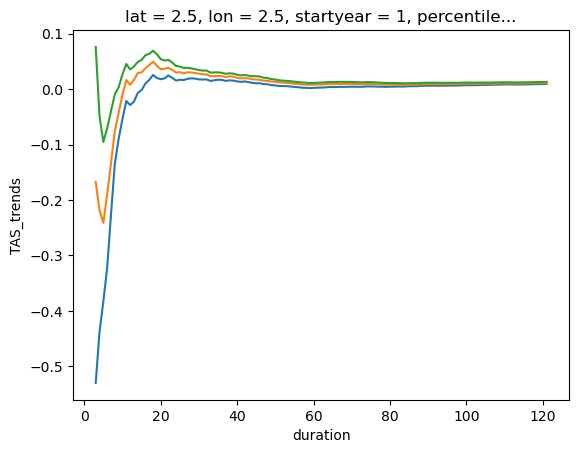

In [14]:
gistemp_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.025).plot()
gistemp_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.5).plot()
gistemp_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.975).plot()

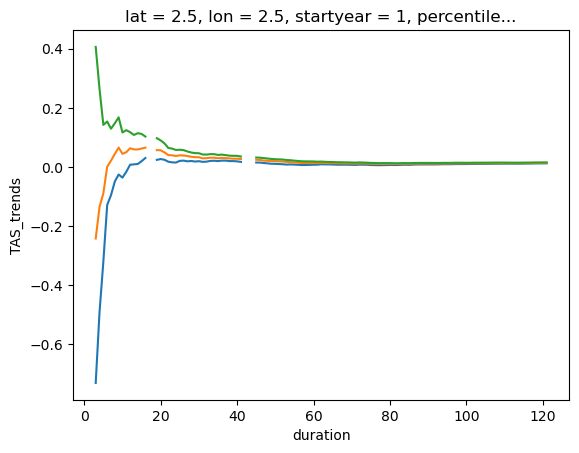

In [15]:
hadcrut5_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.025).plot()
hadcrut5_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.5).plot()
hadcrut5_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.975).plot()

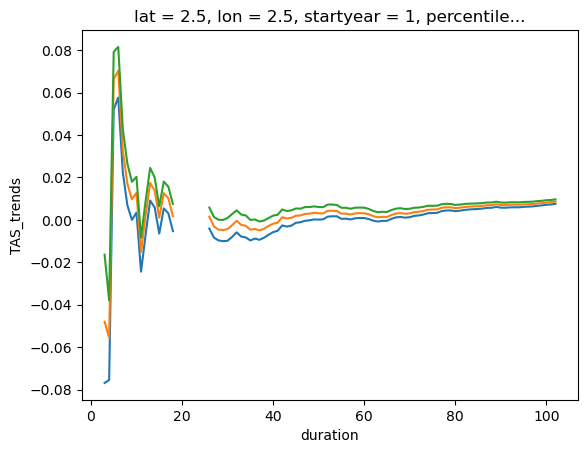

In [16]:
dcent_unfilled_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.025).plot()
dcent_unfilled_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.5).plot()
dcent_unfilled_5x5_trends_percentiles["TAS_trends"].sel(lat=2.5, lon=2.5, percentile=0.975).plot()

Clean-up

In [17]:
del gistemp_5x5_trends_1900, hadcrut5_5x5_trends_1900, dcent_unfilled_5x5_trends_1900
del gistemp_5x5_trends_percentiles, hadcrut5_5x5_trends_percentiles, dcent_unfilled_5x5_trends_percentiles